In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import os
import glob
import re

import sys
sys.path.append("./src/") 

import mnist_data
import plot_utils
import gzip
import importlib

import vae as ve
import matplotlib.pyplot as plt



### Read File 
- SPY data

In [2]:
importlib.reload(ve)

filelists = ['SPY']
mergeddata = ve.readData(filelists)

In [3]:
np_train = mergeddata[0][0]
print(np_train.shape)
np_test = mergeddata[0][1]
print(np_test.shape)
df_train = mergeddata[0][2]
print(df_train.shape)
df_test = mergeddata[0][3]
print(df_test.shape)

(2136, 4083)
(916, 4083)
(2136, 29)
(916, 29)


In [4]:
importlib.reload(ve)

filelists = ['SPY']
dfstocks = ve.readStock(filelists)
dfstock = dfstocks[0]
dfstock.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2007-01-03,141.37,142.25,142.86,140.57,94850000.0,-0.0018
2007-01-04,141.67,141.23,142.05,140.61,69640000.0,0.0021
2007-01-05,140.54,141.33,141.40,140.38,76700000.0,-0.0080
2007-01-08,141.19,140.82,141.41,140.25,71680000.0,0.0046
2007-01-09,141.07,141.31,141.60,140.40,75730000.0,-0.0008


### decoding the np_train data to generate the time dataframe

In [7]:
importlib.reload(ve)

# np_data = np_train
np_data = y_PRR
max_seq_len = 120
df_stock = dfstock
df_data = df_train
decoded_prices = ve.decode_npdata(np_data,max_seq_len,df_stock,df_data)

df_data 2007-06-26 00:00:00 df_stock 2007-06-26 00:00:00
df_data 2007-06-27 00:00:00 df_stock 2007-06-27 00:00:00
df_data 2007-06-28 00:00:00 df_stock 2007-06-28 00:00:00
df_data 2007-06-29 00:00:00 df_stock 2007-06-29 00:00:00
df_data 2007-07-02 00:00:00 df_stock 2007-07-02 00:00:00
df_data 2007-07-03 00:00:00 df_stock 2007-07-03 00:00:00
df_data 2007-07-05 00:00:00 df_stock 2007-07-05 00:00:00
df_data 2007-07-06 00:00:00 df_stock 2007-07-06 00:00:00
df_data 2007-07-09 00:00:00 df_stock 2007-07-09 00:00:00
df_data 2007-07-10 00:00:00 df_stock 2007-07-10 00:00:00
df_data 2007-07-11 00:00:00 df_stock 2007-07-11 00:00:00
df_data 2007-07-12 00:00:00 df_stock 2007-07-12 00:00:00
df_data 2007-07-13 00:00:00 df_stock 2007-07-13 00:00:00
df_data 2007-07-16 00:00:00 df_stock 2007-07-16 00:00:00
df_data 2007-07-17 00:00:00 df_stock 2007-07-17 00:00:00
df_data 2007-07-18 00:00:00 df_stock 2007-07-18 00:00:00
df_data 2007-07-19 00:00:00 df_stock 2007-07-19 00:00:00
df_data 2007-07-20 00:00:00 df_

df_data 2008-05-09 00:00:00 df_stock 2008-05-09 00:00:00
df_data 2008-05-12 00:00:00 df_stock 2008-05-12 00:00:00
df_data 2008-05-13 00:00:00 df_stock 2008-05-13 00:00:00
df_data 2008-05-14 00:00:00 df_stock 2008-05-14 00:00:00
df_data 2008-05-15 00:00:00 df_stock 2008-05-15 00:00:00
df_data 2008-05-16 00:00:00 df_stock 2008-05-16 00:00:00
df_data 2008-05-19 00:00:00 df_stock 2008-05-19 00:00:00
df_data 2008-05-20 00:00:00 df_stock 2008-05-20 00:00:00
df_data 2008-05-21 00:00:00 df_stock 2008-05-21 00:00:00
df_data 2008-05-22 00:00:00 df_stock 2008-05-22 00:00:00
df_data 2008-05-23 00:00:00 df_stock 2008-05-23 00:00:00
df_data 2008-05-27 00:00:00 df_stock 2008-05-27 00:00:00
df_data 2008-05-28 00:00:00 df_stock 2008-05-28 00:00:00
df_data 2008-05-29 00:00:00 df_stock 2008-05-29 00:00:00
df_data 2008-05-30 00:00:00 df_stock 2008-05-30 00:00:00
df_data 2008-06-02 00:00:00 df_stock 2008-06-02 00:00:00
df_data 2008-06-03 00:00:00 df_stock 2008-06-03 00:00:00
df_data 2008-06-04 00:00:00 df_

df_data 2008-12-19 00:00:00 df_stock 2008-12-19 00:00:00
df_data 2008-12-22 00:00:00 df_stock 2008-12-22 00:00:00
df_data 2008-12-23 00:00:00 df_stock 2008-12-23 00:00:00
df_data 2008-12-24 00:00:00 df_stock 2008-12-24 00:00:00
df_data 2008-12-26 00:00:00 df_stock 2008-12-26 00:00:00
df_data 2008-12-29 00:00:00 df_stock 2008-12-29 00:00:00
df_data 2008-12-30 00:00:00 df_stock 2008-12-30 00:00:00
df_data 2008-12-31 00:00:00 df_stock 2008-12-31 00:00:00
df_data 2009-01-02 00:00:00 df_stock 2009-01-02 00:00:00
df_data 2009-01-05 00:00:00 df_stock 2009-01-05 00:00:00
df_data 2009-01-06 00:00:00 df_stock 2009-01-06 00:00:00
df_data 2009-01-07 00:00:00 df_stock 2009-01-07 00:00:00
df_data 2009-01-08 00:00:00 df_stock 2009-01-08 00:00:00
df_data 2009-01-09 00:00:00 df_stock 2009-01-09 00:00:00
df_data 2009-01-12 00:00:00 df_stock 2009-01-12 00:00:00
df_data 2009-01-13 00:00:00 df_stock 2009-01-13 00:00:00
df_data 2009-01-14 00:00:00 df_stock 2009-01-14 00:00:00
df_data 2009-01-15 00:00:00 df_

df_data 2009-07-28 00:00:00 df_stock 2009-07-28 00:00:00
df_data 2009-07-29 00:00:00 df_stock 2009-07-29 00:00:00
df_data 2009-07-30 00:00:00 df_stock 2009-07-30 00:00:00
df_data 2009-07-31 00:00:00 df_stock 2009-07-31 00:00:00
df_data 2009-08-03 00:00:00 df_stock 2009-08-03 00:00:00
df_data 2009-08-04 00:00:00 df_stock 2009-08-04 00:00:00
df_data 2009-08-05 00:00:00 df_stock 2009-08-05 00:00:00
df_data 2009-08-06 00:00:00 df_stock 2009-08-06 00:00:00
df_data 2009-08-07 00:00:00 df_stock 2009-08-07 00:00:00
df_data 2009-08-10 00:00:00 df_stock 2009-08-10 00:00:00
df_data 2009-08-11 00:00:00 df_stock 2009-08-11 00:00:00
df_data 2009-08-12 00:00:00 df_stock 2009-08-12 00:00:00
df_data 2009-08-13 00:00:00 df_stock 2009-08-13 00:00:00
df_data 2009-08-14 00:00:00 df_stock 2009-08-14 00:00:00
df_data 2009-08-17 00:00:00 df_stock 2009-08-17 00:00:00
df_data 2009-08-18 00:00:00 df_stock 2009-08-18 00:00:00
df_data 2009-08-19 00:00:00 df_stock 2009-08-19 00:00:00
df_data 2009-08-20 00:00:00 df_

df_data 2010-05-17 00:00:00 df_stock 2010-05-17 00:00:00
df_data 2010-05-18 00:00:00 df_stock 2010-05-18 00:00:00
df_data 2010-05-19 00:00:00 df_stock 2010-05-19 00:00:00
df_data 2010-05-20 00:00:00 df_stock 2010-05-20 00:00:00
df_data 2010-05-21 00:00:00 df_stock 2010-05-21 00:00:00
df_data 2010-05-24 00:00:00 df_stock 2010-05-24 00:00:00
df_data 2010-05-25 00:00:00 df_stock 2010-05-25 00:00:00
df_data 2010-05-26 00:00:00 df_stock 2010-05-26 00:00:00
df_data 2010-05-27 00:00:00 df_stock 2010-05-27 00:00:00
df_data 2010-05-28 00:00:00 df_stock 2010-05-28 00:00:00
df_data 2010-06-01 00:00:00 df_stock 2010-06-01 00:00:00
df_data 2010-06-02 00:00:00 df_stock 2010-06-02 00:00:00
df_data 2010-06-03 00:00:00 df_stock 2010-06-03 00:00:00
df_data 2010-06-04 00:00:00 df_stock 2010-06-04 00:00:00
df_data 2010-06-07 00:00:00 df_stock 2010-06-07 00:00:00
df_data 2010-06-08 00:00:00 df_stock 2010-06-08 00:00:00
df_data 2010-06-09 00:00:00 df_stock 2010-06-09 00:00:00
df_data 2010-06-10 00:00:00 df_

df_data 2011-02-02 00:00:00 df_stock 2011-02-02 00:00:00
df_data 2011-02-03 00:00:00 df_stock 2011-02-03 00:00:00
df_data 2011-02-04 00:00:00 df_stock 2011-02-04 00:00:00
df_data 2011-02-07 00:00:00 df_stock 2011-02-07 00:00:00
df_data 2011-02-08 00:00:00 df_stock 2011-02-08 00:00:00
df_data 2011-02-09 00:00:00 df_stock 2011-02-09 00:00:00
df_data 2011-02-10 00:00:00 df_stock 2011-02-10 00:00:00
df_data 2011-02-11 00:00:00 df_stock 2011-02-11 00:00:00
df_data 2011-02-14 00:00:00 df_stock 2011-02-14 00:00:00
df_data 2011-02-15 00:00:00 df_stock 2011-02-15 00:00:00
df_data 2011-02-16 00:00:00 df_stock 2011-02-16 00:00:00
df_data 2011-02-17 00:00:00 df_stock 2011-02-17 00:00:00
df_data 2011-02-18 00:00:00 df_stock 2011-02-18 00:00:00
df_data 2011-02-22 00:00:00 df_stock 2011-02-22 00:00:00
df_data 2011-02-23 00:00:00 df_stock 2011-02-23 00:00:00
df_data 2011-02-24 00:00:00 df_stock 2011-02-24 00:00:00
df_data 2011-02-25 00:00:00 df_stock 2011-02-25 00:00:00
df_data 2011-02-28 00:00:00 df_

df_data 2011-09-16 00:00:00 df_stock 2011-09-16 00:00:00
df_data 2011-09-19 00:00:00 df_stock 2011-09-19 00:00:00
df_data 2011-09-20 00:00:00 df_stock 2011-09-20 00:00:00
df_data 2011-09-21 00:00:00 df_stock 2011-09-21 00:00:00
df_data 2011-09-22 00:00:00 df_stock 2011-09-22 00:00:00
df_data 2011-09-23 00:00:00 df_stock 2011-09-23 00:00:00
df_data 2011-09-26 00:00:00 df_stock 2011-09-26 00:00:00
df_data 2011-09-27 00:00:00 df_stock 2011-09-27 00:00:00
df_data 2011-09-28 00:00:00 df_stock 2011-09-28 00:00:00
df_data 2011-09-29 00:00:00 df_stock 2011-09-29 00:00:00
df_data 2011-09-30 00:00:00 df_stock 2011-09-30 00:00:00
df_data 2011-10-03 00:00:00 df_stock 2011-10-03 00:00:00
df_data 2011-10-04 00:00:00 df_stock 2011-10-04 00:00:00
df_data 2011-10-05 00:00:00 df_stock 2011-10-05 00:00:00
df_data 2011-10-06 00:00:00 df_stock 2011-10-06 00:00:00
df_data 2011-10-07 00:00:00 df_stock 2011-10-07 00:00:00
df_data 2011-10-10 00:00:00 df_stock 2011-10-10 00:00:00
df_data 2011-10-11 00:00:00 df_

df_data 2012-08-08 00:00:00 df_stock 2012-08-08 00:00:00
df_data 2012-08-09 00:00:00 df_stock 2012-08-09 00:00:00
df_data 2012-08-10 00:00:00 df_stock 2012-08-10 00:00:00
df_data 2012-08-13 00:00:00 df_stock 2012-08-13 00:00:00
df_data 2012-08-14 00:00:00 df_stock 2012-08-14 00:00:00
df_data 2012-08-15 00:00:00 df_stock 2012-08-15 00:00:00
df_data 2012-08-16 00:00:00 df_stock 2012-08-16 00:00:00
df_data 2012-08-17 00:00:00 df_stock 2012-08-17 00:00:00
df_data 2012-08-20 00:00:00 df_stock 2012-08-20 00:00:00
df_data 2012-08-21 00:00:00 df_stock 2012-08-21 00:00:00
df_data 2012-08-22 00:00:00 df_stock 2012-08-22 00:00:00
df_data 2012-08-23 00:00:00 df_stock 2012-08-23 00:00:00
df_data 2012-08-24 00:00:00 df_stock 2012-08-24 00:00:00
df_data 2012-08-27 00:00:00 df_stock 2012-08-27 00:00:00
df_data 2012-08-28 00:00:00 df_stock 2012-08-28 00:00:00
df_data 2012-08-29 00:00:00 df_stock 2012-08-29 00:00:00
df_data 2012-08-30 00:00:00 df_stock 2012-08-30 00:00:00
df_data 2012-08-31 00:00:00 df_

df_data 2013-06-13 00:00:00 df_stock 2013-06-13 00:00:00
df_data 2013-06-14 00:00:00 df_stock 2013-06-14 00:00:00
df_data 2013-06-17 00:00:00 df_stock 2013-06-17 00:00:00
df_data 2013-06-18 00:00:00 df_stock 2013-06-18 00:00:00
df_data 2013-06-19 00:00:00 df_stock 2013-06-19 00:00:00
df_data 2013-06-20 00:00:00 df_stock 2013-06-20 00:00:00
df_data 2013-06-21 00:00:00 df_stock 2013-06-21 00:00:00
df_data 2013-06-24 00:00:00 df_stock 2013-06-24 00:00:00
df_data 2013-06-25 00:00:00 df_stock 2013-06-25 00:00:00
df_data 2013-06-26 00:00:00 df_stock 2013-06-26 00:00:00
df_data 2013-06-27 00:00:00 df_stock 2013-06-27 00:00:00
df_data 2013-06-28 00:00:00 df_stock 2013-06-28 00:00:00
df_data 2013-07-01 00:00:00 df_stock 2013-07-01 00:00:00
df_data 2013-07-02 00:00:00 df_stock 2013-07-02 00:00:00
df_data 2013-07-03 00:00:00 df_stock 2013-07-03 00:00:00
df_data 2013-07-05 00:00:00 df_stock 2013-07-05 00:00:00
df_data 2013-07-08 00:00:00 df_stock 2013-07-08 00:00:00
df_data 2013-07-09 00:00:00 df_

df_data 2014-01-15 00:00:00 df_stock 2014-01-15 00:00:00
df_data 2014-01-16 00:00:00 df_stock 2014-01-16 00:00:00
df_data 2014-01-17 00:00:00 df_stock 2014-01-17 00:00:00
df_data 2014-01-21 00:00:00 df_stock 2014-01-21 00:00:00
df_data 2014-01-22 00:00:00 df_stock 2014-01-22 00:00:00
df_data 2014-01-23 00:00:00 df_stock 2014-01-23 00:00:00
df_data 2014-01-24 00:00:00 df_stock 2014-01-24 00:00:00
df_data 2014-01-27 00:00:00 df_stock 2014-01-27 00:00:00
df_data 2014-01-28 00:00:00 df_stock 2014-01-28 00:00:00
df_data 2014-01-29 00:00:00 df_stock 2014-01-29 00:00:00
df_data 2014-01-30 00:00:00 df_stock 2014-01-30 00:00:00
df_data 2014-01-31 00:00:00 df_stock 2014-01-31 00:00:00
df_data 2014-02-03 00:00:00 df_stock 2014-02-03 00:00:00
df_data 2014-02-04 00:00:00 df_stock 2014-02-04 00:00:00
df_data 2014-02-05 00:00:00 df_stock 2014-02-05 00:00:00
df_data 2014-02-06 00:00:00 df_stock 2014-02-06 00:00:00
df_data 2014-02-07 00:00:00 df_stock 2014-02-07 00:00:00
df_data 2014-02-10 00:00:00 df_

df_data 2014-09-11 00:00:00 df_stock 2014-09-11 00:00:00
df_data 2014-09-12 00:00:00 df_stock 2014-09-12 00:00:00
df_data 2014-09-15 00:00:00 df_stock 2014-09-15 00:00:00
df_data 2014-09-16 00:00:00 df_stock 2014-09-16 00:00:00
df_data 2014-09-17 00:00:00 df_stock 2014-09-17 00:00:00
df_data 2014-09-18 00:00:00 df_stock 2014-09-18 00:00:00
df_data 2014-09-19 00:00:00 df_stock 2014-09-19 00:00:00
df_data 2014-09-22 00:00:00 df_stock 2014-09-22 00:00:00
df_data 2014-09-23 00:00:00 df_stock 2014-09-23 00:00:00
df_data 2014-09-24 00:00:00 df_stock 2014-09-24 00:00:00
df_data 2014-09-25 00:00:00 df_stock 2014-09-25 00:00:00
df_data 2014-09-26 00:00:00 df_stock 2014-09-26 00:00:00
df_data 2014-09-29 00:00:00 df_stock 2014-09-29 00:00:00
df_data 2014-09-30 00:00:00 df_stock 2014-09-30 00:00:00
df_data 2014-10-01 00:00:00 df_stock 2014-10-01 00:00:00
df_data 2014-10-02 00:00:00 df_stock 2014-10-02 00:00:00
df_data 2014-10-03 00:00:00 df_stock 2014-10-03 00:00:00
df_data 2014-10-06 00:00:00 df_

df_data 2015-05-01 00:00:00 df_stock 2015-05-01 00:00:00
df_data 2015-05-04 00:00:00 df_stock 2015-05-04 00:00:00
df_data 2015-05-05 00:00:00 df_stock 2015-05-05 00:00:00
df_data 2015-05-06 00:00:00 df_stock 2015-05-06 00:00:00
df_data 2015-05-07 00:00:00 df_stock 2015-05-07 00:00:00
df_data 2015-05-08 00:00:00 df_stock 2015-05-08 00:00:00
df_data 2015-05-11 00:00:00 df_stock 2015-05-11 00:00:00
df_data 2015-05-12 00:00:00 df_stock 2015-05-12 00:00:00
df_data 2015-05-13 00:00:00 df_stock 2015-05-13 00:00:00
df_data 2015-05-14 00:00:00 df_stock 2015-05-14 00:00:00
df_data 2015-05-15 00:00:00 df_stock 2015-05-15 00:00:00
df_data 2015-05-18 00:00:00 df_stock 2015-05-18 00:00:00
df_data 2015-05-19 00:00:00 df_stock 2015-05-19 00:00:00
df_data 2015-05-20 00:00:00 df_stock 2015-05-20 00:00:00
df_data 2015-05-21 00:00:00 df_stock 2015-05-21 00:00:00
df_data 2015-05-22 00:00:00 df_stock 2015-05-22 00:00:00
df_data 2015-05-26 00:00:00 df_stock 2015-05-26 00:00:00
df_data 2015-05-27 00:00:00 df_

df_data 2015-12-07 00:00:00 df_stock 2015-12-07 00:00:00
df_data 2015-12-08 00:00:00 df_stock 2015-12-08 00:00:00
df_data 2015-12-09 00:00:00 df_stock 2015-12-09 00:00:00
df_data 2015-12-10 00:00:00 df_stock 2015-12-10 00:00:00
df_data 2015-12-11 00:00:00 df_stock 2015-12-11 00:00:00
df_data 2015-12-14 00:00:00 df_stock 2015-12-14 00:00:00
df_data 2015-12-15 00:00:00 df_stock 2015-12-15 00:00:00
df_data 2015-12-16 00:00:00 df_stock 2015-12-16 00:00:00


In [8]:
df_train['Close_Decode'] = np.array(decoded_prices['Close'])
df_train['Open_Decode'] = np.array(decoded_prices['Open'])
df_train['High_Decode'] = np.array(decoded_prices['High'])
df_train['Low_Decode'] = np.array(decoded_prices['Low'])
df_train['CurOpen_Decode'] = np.array(decoded_prices['CurOpen'])

<IPython.core.display.Javascript object>


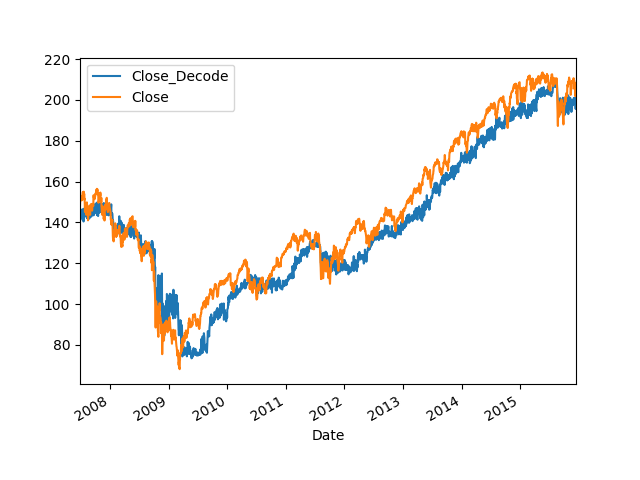

In [13]:
%matplotlib notebook

df_train[['Close_Decode','Close']].plot()
# df_train[['Open_Decode','Open']].plot()
# df_train[['High_Decode','High']].plot()
plt.savefig("./pictures/gen_stock.png")

### decode stock data from variational autoencoder

In [5]:
importlib.reload(ve)

with tf.Session() as sess:
    learning_rate= 0.0005
    dense_layers = [1500,700,300]
    dense_funcs = ['elu','elu','tanh']
    dim_z = 2#20 # latent vector size
    dim_out = np_train.shape[1]
    
    
    autoencoder = ve.vae(sess,learning_rate,dense_layers,dense_funcs,dim_z,dim_out)
    autoencoder.load()
    
    sess.run(tf.global_variables_initializer(), feed_dict={autoencoder.keep_prob : 0.9})
    
    x_PRR = np_train
    y_PRR = sess.run(autoencoder.y, feed_dict={autoencoder.x_hat: x_PRR, autoencoder.keep_prob : 1})
        

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
INFO:tensorflow:Restoring parameters from ./model/vae.model-1
 [*] Success to read vae.model-1


In [6]:
y_PRR.shape

(2136, 4083)

In [5]:
importlib.reload(ve)

with tf.Session() as sess:
        
    learning_rate= 0.0005
    dense_layers = [1500,700,300]
    dense_funcs = ['elu','elu','tanh']
    dim_z = 2#20 # latent vector size
    dim_out = np_train.shape[1]
    
    
    autoencoder = ve.vae(sess,learning_rate,dense_layers,dense_funcs,dim_z,dim_out)
    sess.run(tf.global_variables_initializer(), feed_dict={autoencoder.keep_prob : 0.9})
    
    # train
    n_epochs = 200
    batch_size = 40
    n_samples = np_train.shape[0]
    total_batch = int(n_samples / batch_size)
    ADD_NOISE = True
    train_total_data = np_train
    
    for epoch in range(n_epochs):

        # Random shuffling
        np.random.shuffle(train_total_data)
        train_data_ = train_total_data

        # Loop over all batches
        for i in range(total_batch):
            # Compute the offset of the current minibatch in the data.
            offset = (i * batch_size) % (n_samples)
            batch_xs_input = train_data_[offset:(offset + batch_size), :]

            batch_xs_target = batch_xs_input
            
            
            # add salt & pepper noise
            if ADD_NOISE:
                batch_xs_input = batch_xs_input * np.random.randint(2, size=batch_xs_input.shape)
                batch_xs_input += np.random.randint(2, size=batch_xs_input.shape)
            
            _, tot_loss, loss_likelihood, loss_divergence = sess.run(
                (autoencoder.train_op, autoencoder.loss, autoencoder.neg_marginal_likelihood, autoencoder.KL_divergence),
                feed_dict={autoencoder.x_hat: batch_xs_input, autoencoder.x: batch_xs_target, autoencoder.keep_prob : 0.9})
            
            
#         print("epoch {}".format(epoch))
        # print cost every epoch
        print("epoch %d: L_tot %03.2f L_likelihood %03.2f L_divergence %03.2f" % (epoch, tot_loss, loss_likelihood, loss_divergence))

        
    autoencoder.save(1)

encoder_dense_layers [1500, 700, 300, 2]
gaussian encoder mean:(?, 2) 
mu:(?, 2) sigma:(?, 2)
encoder output z:(?, 2)
decoder_dense_layers [300, 700, 1500, 4083]
decoder output y:(?, 4083)
epoch 0: L_tot 2838.59 L_likelihood 2834.54 L_divergence 4.06
epoch 1: L_tot 2795.68 L_likelihood 2790.99 L_divergence 4.69
epoch 2: L_tot 2794.58 L_likelihood 2790.65 L_divergence 3.93
epoch 3: L_tot 2791.28 L_likelihood 2787.05 L_divergence 4.23
epoch 4: L_tot 2778.79 L_likelihood 2774.57 L_divergence 4.22
epoch 5: L_tot 2773.77 L_likelihood 2770.23 L_divergence 3.54
epoch 6: L_tot 2742.74 L_likelihood 2738.85 L_divergence 3.89
epoch 7: L_tot 2754.90 L_likelihood 2750.95 L_divergence 3.96
epoch 8: L_tot 2773.33 L_likelihood 2769.71 L_divergence 3.61
epoch 9: L_tot 2765.10 L_likelihood 2761.55 L_divergence 3.54
epoch 10: L_tot 2756.65 L_likelihood 2753.39 L_divergence 3.26
epoch 11: L_tot 2744.59 L_likelihood 2741.33 L_divergence 3.26
epoch 12: L_tot 2730.71 L_likelihood 2727.73 L_divergence 2.98
ep

epoch 127: L_tot 2730.89 L_likelihood 2727.92 L_divergence 2.97
epoch 128: L_tot 2733.84 L_likelihood 2731.06 L_divergence 2.77
epoch 129: L_tot 2743.32 L_likelihood 2740.63 L_divergence 2.69
epoch 130: L_tot 2735.10 L_likelihood 2732.35 L_divergence 2.75
epoch 131: L_tot 2751.76 L_likelihood 2749.17 L_divergence 2.60
epoch 132: L_tot 2741.37 L_likelihood 2737.97 L_divergence 3.40
epoch 133: L_tot 2735.93 L_likelihood 2732.81 L_divergence 3.12
epoch 134: L_tot 2757.92 L_likelihood 2754.72 L_divergence 3.20
epoch 135: L_tot 2761.03 L_likelihood 2757.94 L_divergence 3.08
epoch 136: L_tot 2737.43 L_likelihood 2734.26 L_divergence 3.17
epoch 137: L_tot 2756.29 L_likelihood 2753.23 L_divergence 3.06
epoch 138: L_tot 2738.48 L_likelihood 2735.32 L_divergence 3.16
epoch 139: L_tot 2755.57 L_likelihood 2752.25 L_divergence 3.33
epoch 140: L_tot 2747.30 L_likelihood 2744.77 L_divergence 2.53
epoch 141: L_tot 2742.25 L_likelihood 2739.67 L_divergence 2.58
epoch 142: L_tot 2746.35 L_likelihood 27